# Bias Variance Tradeoff

In this notebook we investigate the bias and variance of models. In the first section we'll investigate fitting functions of the form:

$$f(x) = a + b * x^n$$

to some cubic data with noise.

In [1]:
% matplotlib inline
import random

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from sklearn import datasets, linear_model

## Some helper functions
The following functions will generate data and polynomial values.

In [2]:
def polynomials(X, degree=1):
    array = [X]
    y = X
    for i in range(2, int(degree + 1)):
        y = y * X
        array.append(y)
    return np.array(array).transpose()

def monomials(X, degree=1):
    y = np.array(X)
    y = np.power(X, degree)
    return np.array([y]).transpose()

def generate_data(func, a, b, n=100):
    data = []
    for _ in range(n):
        x = random.random() * (b - a)
        y = func(x)
        data.append((x, y))
    return list(sorted(data))

In [3]:
X = np.array(range(10))
polynomials(X, 3)

array([[  0,   0,   0],
       [  1,   1,   1],
       [  2,   4,   8],
       [  3,   9,  27],
       [  4,  16,  64],
       [  5,  25, 125],
       [  6,  36, 216],
       [  7,  49, 343],
       [  8,  64, 512],
       [  9,  81, 729]])

In [4]:
mu, sigma = 0, 0.1 # mean and standard deviation
# norm = np.random.normal(mu, sigma)

# Generate some data for the formula below
f = lambda x: 4 + 5 * x - 3 * x*x + 0.1 * x * x * x + np.random.normal(mu, sigma)
data = generate_data(f, 0, 2, n=20)

## Fitting Polynomial Functions

Here we fit try to fit our sample data with an increasing exponent:

$$f(x) = 1 + b x^n$$

None of these models are quite right because the data is generate from the function

$$ \hat{f}(x) = 4 + 5 x - 3 x^2 + 0.1 x^3$$

So each model is not quite right because one or more terms is missing. This will allow us to take a closer look at the bias-variance tradeoff.

Let's start with $n = 1, 2, 3, 4$.

('Coefficients: \n', array([-0.09635083]))
Variance score: 0.01
Residual sum of squares: 0.51
Bias: 0.491761921261
Variance: 0.00339614037148


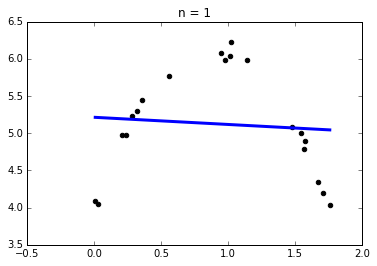

('Coefficients: \n', array([-0.19704886]))
Variance score: 0.10
Residual sum of squares: 0.51
Bias: 0.447019514983
Variance: 0.0481385466502


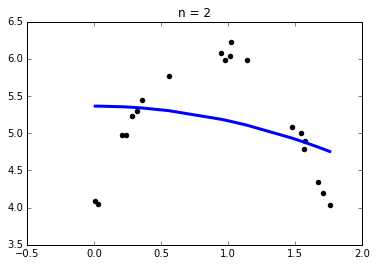

('Coefficients: \n', array([-0.16045128]))
Variance score: 0.19
Residual sum of squares: 0.51
Bias: 0.400407338357
Variance: 0.0947507232759


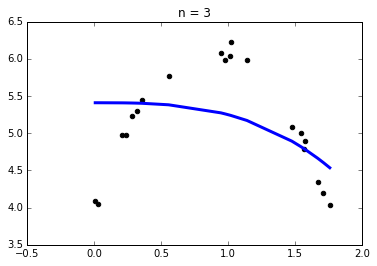

('Coefficients: \n', array([-0.10970828]))
Variance score: 0.26
Residual sum of squares: 0.51
Bias: 0.366249444168
Variance: 0.128908617465


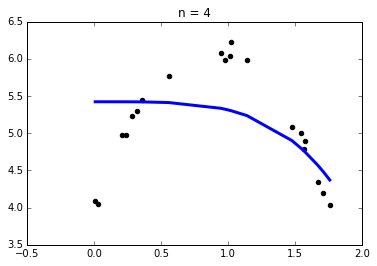

('Coefficients: \n', array([-0.0699322]))
Variance score: 0.30
Residual sum of squares: 0.51
Bias: 0.343397282058
Variance: 0.151760779575


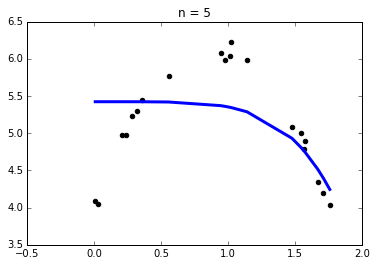

('Coefficients: \n', array([-0.04302118]))
Variance score: 0.33
Residual sum of squares: 0.51
Bias: 0.328707570048
Variance: 0.166450491585


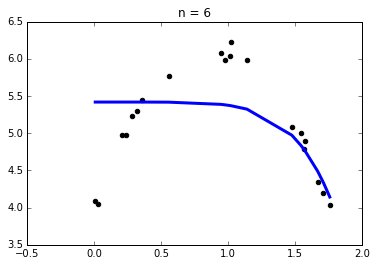

('Coefficients: \n', array([-0.0259103]))
Variance score: 0.35
Residual sum of squares: 0.51
Bias: 0.319662256837
Variance: 0.175495804795


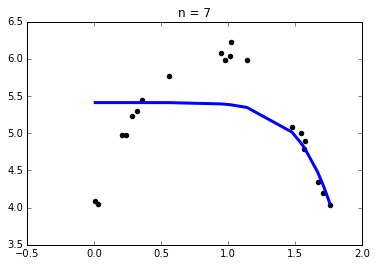

('Coefficients: \n', array([-0.01538363]))
Variance score: 0.36
Residual sum of squares: 0.51
Bias: 0.314522106325
Variance: 0.180635955308


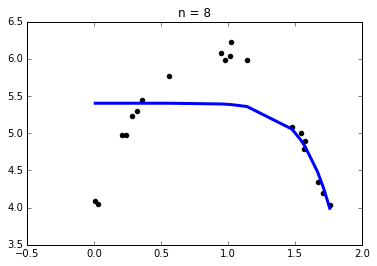

('Coefficients: \n', array([-0.0090393]))
Variance score: 0.36
Residual sum of squares: 0.51
Bias: 0.312104375104
Variance: 0.183053686528


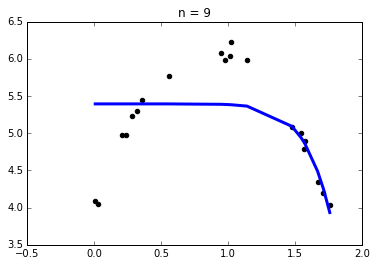

In [5]:
domain = np.array([x[0] for x in data])
Y = np.array([x[1] for x in data])


for i in range(1, 10):
    X = monomials(domain, i) 
    # Create linear regression object and fit it to X and Y
    regr = linear_model.LinearRegression()
    regr.fit(X, Y)
    yhat = regr.predict(X)
    sse = np.mean((np.mean(yhat)-Y)**2)
    var = np.var(yhat)
    bias = sse - var - .01
    
    # The coefficients
    print('Coefficients: \n', regr.coef_)
    # Explained variance score: 1 is perfect prediction
    print('Variance score: %.2f' % regr.score(X, Y))

    # The mean square error
    print("Residual sum of squares: %.2f" % sse)

    print("Bias: {bias}".format(bias=bias))
    print("Variance: {var}".format(var=var))
        
    # Plot outputs
    plt.scatter(domain, Y,  color='black')
    plt.plot(domain, regr.predict(X), color='blue', linewidth=3)

    plt.title("n = " + str(i))

    plt.show()

It's important to note that the true measures of bias and variance are averaged over many fits to many samples from the same data source, and we're only looking at one instance here. Notice that the bias is at first decreasing as the exponent increases, but at $n=6$ we see the bias start to increase while the squared errors are basically unchanged. Let's make a plot of the bias as the exponent increases.

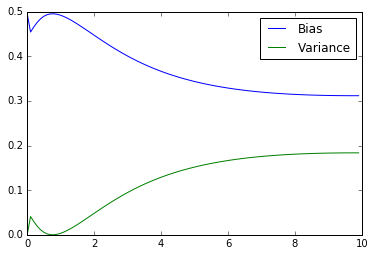

In [6]:
bs = [] #list of biases
vars_ = [] #list of variances
exps = np.arange(0, 10, 0.1)

for i in exps:
    X = monomials(domain, i)
    # Create linear regression object
    regr = linear_model.LinearRegression()
    regr.fit(X, Y)
    # Calculate statistics
    yhat = regr.predict(X)
    sse = np.mean((np.mean(yhat)-Y)**2)
    var = np.var(yhat)
    bias = sse - var - .01
    
    bs.append(bias)
    vars_.append(var)

#Plot the variance and bias
plt.plot(exps, bs, label="Bias")
plt.plot(exps, vars_, label="Variance")
ax = plt.gca()

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

plt.show()

Just as in the conceptual diagram from the lesson, there's a spot where the bias is minimized around $n=5$.

# Variance

Now let's try to fit the full polynomial as the degree increases, which will help us visualize variance error.

**Check**: In the next code section, what changes when compared to the code above?

('Coefficients: \n', array([-0.09635083]))
Variance score: 0.01
Residual sum of squares: 0.51
Bias: 0.491761921261
Variance: 0.00339614037148


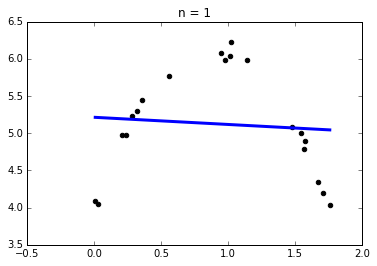

('Coefficients: \n', array([ 4.81427033, -2.7415429 ]))
Variance score: 0.99
Residual sum of squares: 0.51
Bias: -0.00490234141798
Variance: 0.500060403051


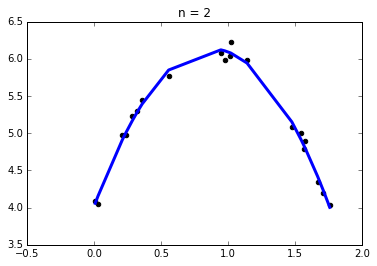

('Coefficients: \n', array([ 4.87593328, -2.83062575,  0.03314943]))
Variance score: 0.99
Residual sum of squares: 0.51
Bias: -0.0049159714482
Variance: 0.500074033081


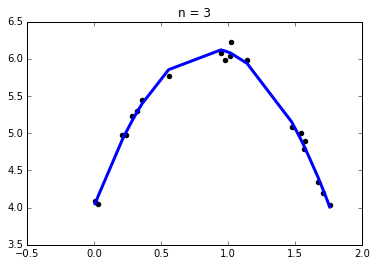

('Coefficients: \n', array([ 5.19690324, -3.79198056,  0.95113159, -0.27130945]))
Variance score: 0.99
Residual sum of squares: 0.51
Bias: -0.00515844416856
Variance: 0.500316505801


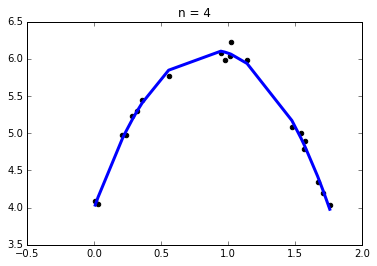

('Coefficients: \n', array([ 6.26745118, -8.9557312 ,  9.08994345, -5.41441957,  1.13372648]))
Variance score: 0.99
Residual sum of squares: 0.51
Bias: -0.00563709856431
Variance: 0.500795160197


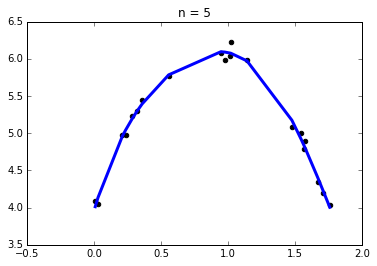

('Coefficients: \n', array([  5.20001424,  -1.79860782,  -8.45589111,  14.04374902,
        -8.78517118,   1.88982068]))
Variance score: 0.99
Residual sum of squares: 0.51
Bias: -0.00582248593841
Variance: 0.500980547571


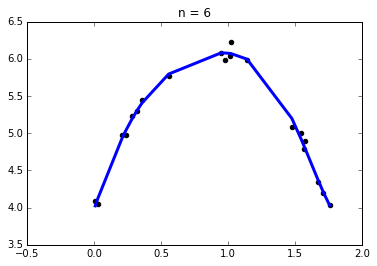

('Coefficients: \n', array([   2.33073433,   21.69536959,  -82.97215746,  128.49345369,
        -99.9946526 ,   38.21949507,   -5.71969848]))
Variance score: 0.99
Residual sum of squares: 0.51
Bias: -0.0061567471032
Variance: 0.501314808736


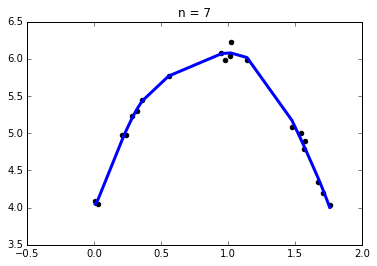

('Coefficients: \n', array([  -1.48842802,   59.96662398, -239.7332161 ,  456.14959982,
       -479.39921745,  284.24121535,  -89.31406385,   11.58582512]))
Variance score: 0.99
Residual sum of squares: 0.51
Bias: -0.00648620356963
Variance: 0.501644265203


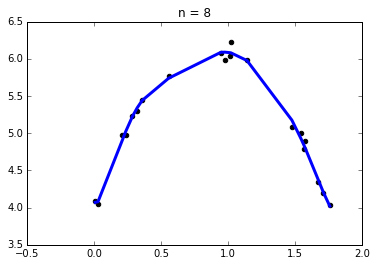

('Coefficients: \n', array([   1.16094634,   25.38319729,  -52.46667716,  -68.36470591,
        356.37733891, -502.34670736,  343.29486755, -116.9130331 ,
         15.91950505]))
Variance score: 0.99
Residual sum of squares: 0.51
Bias: -0.00655917129803
Variance: 0.501717232931


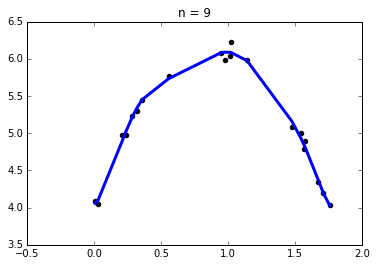

In [7]:
domain = np.array([x[0] for x in data])
Y = np.array([x[1] for x in data])

for i in range(1, 10):
    X = polynomials(domain, i)
    # Create linear regression object
    regr = linear_model.LinearRegression()
    regr.fit(X,Y)

    yhat = regr.predict(X)
    sse = np.mean((np.mean(yhat)-Y)**2)
    var = np.var(yhat)
    bias = sse - var - .01
    
    # The coefficients
    print('Coefficients: \n', regr.coef_)
    # Explained variance score: 1 is perfect prediction
    print('Variance score: %.2f' % regr.score(X, Y))

    # The mean square error
    print("Residual sum of squares: %.2f" % sse)

    print("Bias: {bias}".format(bias=bias))
    print("Variance: {var}".format(var=var))
        
    # Plot outputs
    plt.scatter(domain, Y,  color='black')
    plt.plot(domain, regr.predict(X), color='blue', linewidth=3)

    plt.title("n = " + str(i))

    plt.show()

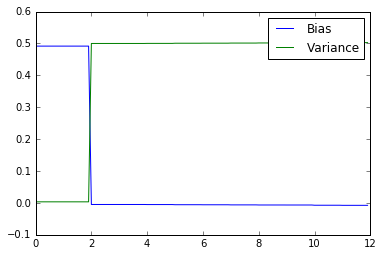

In [8]:
bs = []
vars = []
exps = np.arange(0, 12, .1)

for i in exps:
    X = polynomials(domain, i)
    # Create linear regression object
    regr = linear_model.LinearRegression()
    regr.fit(X, Y)

    yhat = regr.predict(X)
    sse = np.mean((np.mean(yhat) - Y) ** 2)
    var = np.var(yhat)
    bias = sse - var - 0.01
    bs.append(bias)
    vars.append(var)

plt.plot(exps, bs, label="Bias")
plt.plot(exps, vars, label="Variance")
ax = plt.gca()

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

plt.show()

Notice that the fits for $n = 2, 3, 4$ are pretty good. As the exponent increases, the best fit curve is overfitting the dataset, and the shape of the curve does not reflect what we know the underlying data to really look like. In this case we have error due to variance -- with too many parameters, our model is fitting the random variations in the data which we generally want to avoid.

# Guided Practice

We've seen that as the complexity in our models change so too do the bias and variance. Let's investigate from another angle using linear regression. Rather than change the model, we'll change the underlying data to be drawn from a higher dimensional model.

Your tasks are:
* Fill in the code to fit a linear regression to the data
* Investiage the bias and variance as the data source changes in complexity

Residual sum of squares: 0.32
Bias: -0.00265905357096
Variance: 0.313333754233


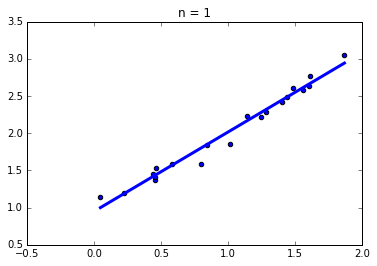

Residual sum of squares: 7.43
Bias: 0.654784179028
Variance: 6.76483170189


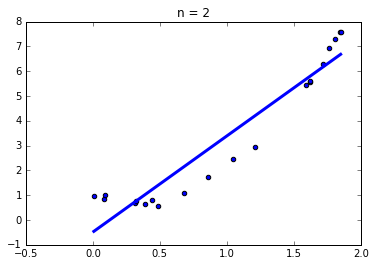

Residual sum of squares: 25.96
Bias: 3.5679277773
Variance: 22.3804851362


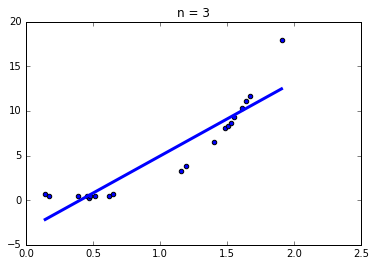

Residual sum of squares: 200.02
Bias: 46.9781359847
Variance: 153.032204052


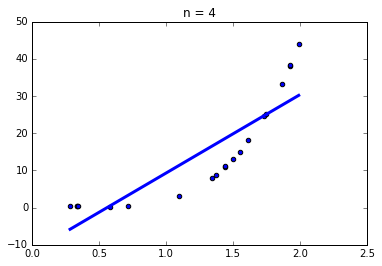

Residual sum of squares: 619.28
Bias: 248.834965688
Variance: 370.439420868


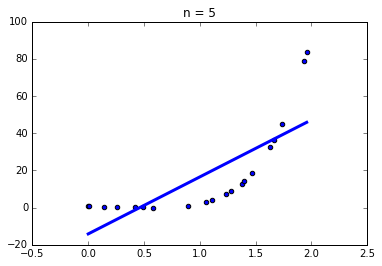

Residual sum of squares: 3507.08
Bias: 1101.46762888
Variance: 2405.60459239


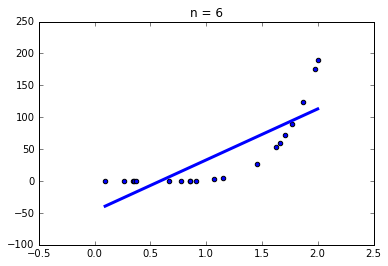

In [9]:
for i in range(1, 7):
    # Generate some data
    f = lambda x: 1 - 2 * x + 3 * x ** i + np.random.normal(mu, sigma)
    data = generate_data(f, 0, 2, n=20)

    domain = np.array([x[0] for x in data])
    Y = np.array([x[1] for x in data])

    X = np.array([domain]).transpose() #this is keeping the X not evolving, meaning that the model fit is pretty much the same
    # Create linear regression object
    regr = linear_model.LinearRegression()
    regr.fit(X,Y)
    yhat = regr.predict(X)
   
    # Computer the errors
    sse = np.mean((np.mean(yhat)-Y)**2)
    var = np.var(yhat)
    bias = sse - var - .01

    # Plot outputs
    print("Residual sum of squares: %.2f" % sse)

    print("Bias: {bias}".format(bias=bias))
    print("Variance: {var}".format(var=var))
    
    plt.scatter(domain, Y)
    plt.plot(domain, regr.predict(X), color = "blue", linewidth=3)
    plt.title("n = " + str(i))

    plt.show()
    

# Advanced Exercises

Some functions, like $sin$ and $exp$ can be better fit with increasing large polynomials.

* By modifying the above code, fit polynomials of degree $n$ as $n$ ranges from 1 to 10 to $sin$ on the interval $[0, 2 \pi]$.
* Can you explain why the bias and variance continue to decrease as $n$ gets large?

Residual sum of squares: 0.54
Bias: 0.20775451916
Variance: 0.327011079421


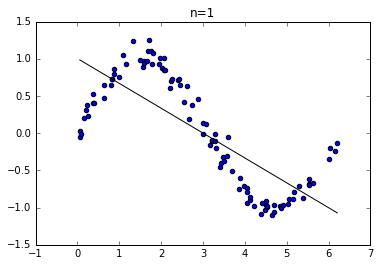

Residual sum of squares: 0.54
Bias: 0.200282356311
Variance: 0.334483242269


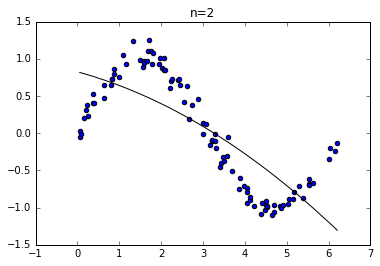

Residual sum of squares: 0.54
Bias: 0.00417960827466
Variance: 0.530585990306


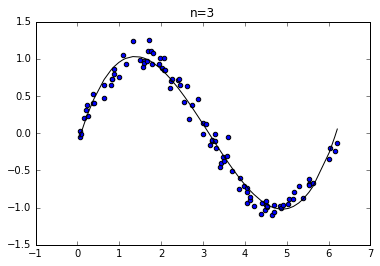

Residual sum of squares: 0.54
Bias: 0.00410925318373
Variance: 0.530656345397


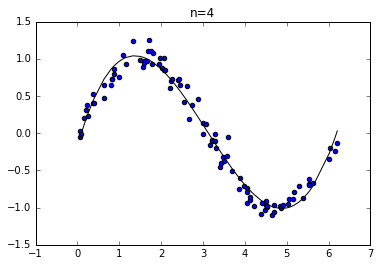

Residual sum of squares: 0.54
Bias: 6.44597095483e-05
Variance: 0.534701138871


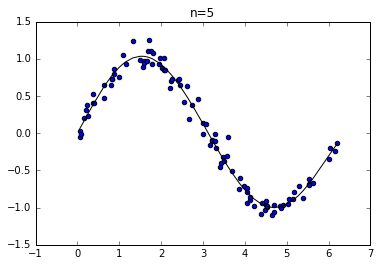

Residual sum of squares: 0.54
Bias: 2.07551712372e-05
Variance: 0.53474484341


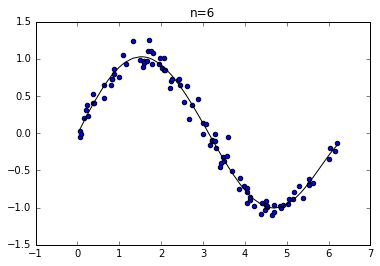

Residual sum of squares: 0.54
Bias: 1.66477937039e-05
Variance: 0.534748950787


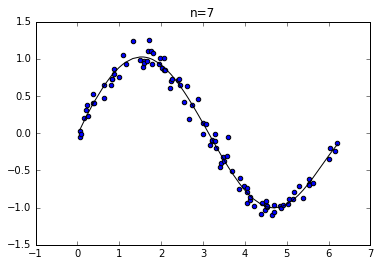

Residual sum of squares: 0.54
Bias: -3.78592628346e-06
Variance: 0.534769384507


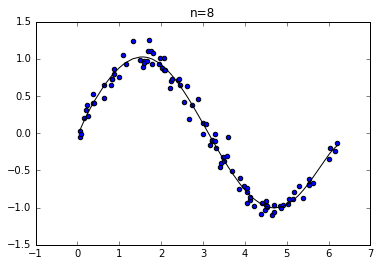

Residual sum of squares: 0.54
Bias: -0.000558957660891
Variance: 0.535324556242


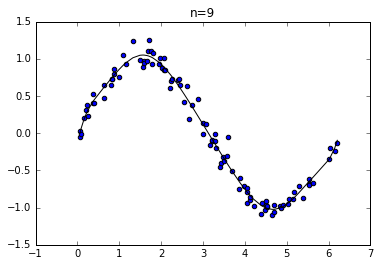

In [15]:
import math
f = lambda x: math.sin(x) + np.random.normal(mu, sigma)
data = generate_data(f, 0, 2*3.14, n=100)

domain = np.array([x[0] for x in data])
Y = np.array([x[1] for x in data])
    
for i in range(1, 10):
    # Fit a polynomial of degree i to the data
    X = polynomials(domain, i)
    regr = linear_model.LinearRegression()
    regr.fit(X,Y)
    yhat = regr.predict(X)
    # Compute the errors
    mse = np.mean((np.mean(yhat)-Y)**2)
    var = np.var(yhat)
    bias = mse - var -.01
    # Plot outputs
    print("Residual sum of squares: %.2f" % mse)
    print("Bias: {bias}".format(bias=bias))
    print("Variance: {var}".format(var=var))
    plt.scatter(domain, Y)
    plt.plot(domain, regr.predict(X), color = "black")
    plt.title("n=" + str(i)) 
    plt.show()

### Repeat the same exercise with the function

$$ y = e^x $$

You should again find that larger polynomials fit the data better.


Residual sum of squares: 282443930046.13
Bias: 1.86232039429e+11
Variance: 96211890617.2


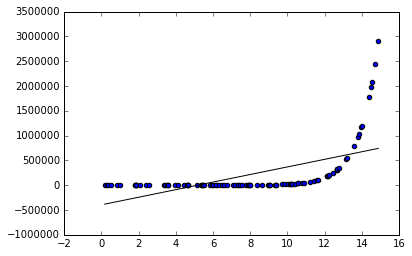

Residual sum of squares: 282443930046.13
Bias: 93368738532.7
Variance: 1.89075191513e+11


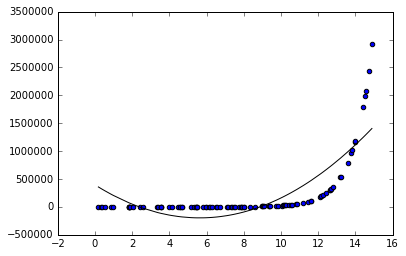

Residual sum of squares: 282443930046.13
Bias: 34917709080.2
Variance: 2.47526220966e+11


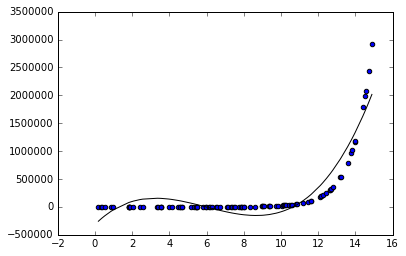

Residual sum of squares: 282443930046.13
Bias: 10137076368.8
Variance: 2.72306853677e+11


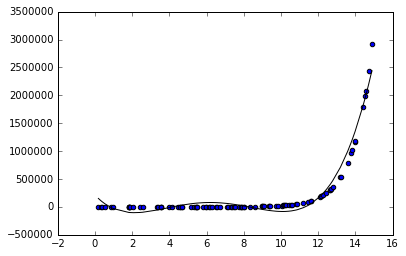

Residual sum of squares: 282443930046.13
Bias: 2301405610.38
Variance: 2.80142524436e+11


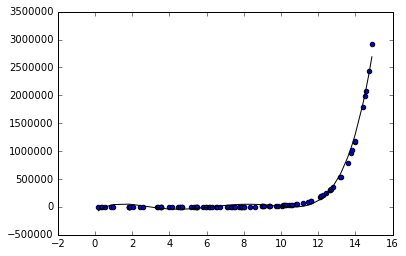

Residual sum of squares: 282443930046.13
Bias: 454474230.846
Variance: 2.81989455815e+11


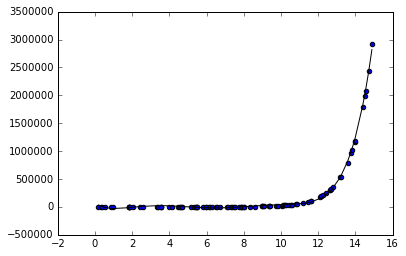

Residual sum of squares: 282443930046.13
Bias: 70774973.7902
Variance: 2.82373155072e+11


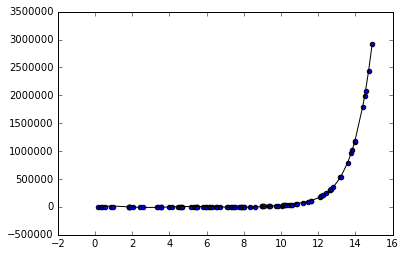

Residual sum of squares: 282443930046.13
Bias: 8599529.28852
Variance: 2.82435330517e+11


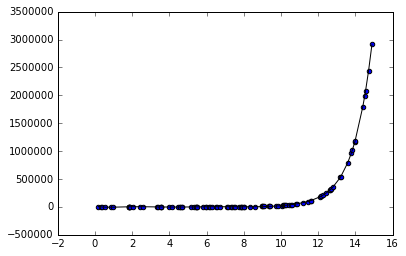

Residual sum of squares: 282443930046.13
Bias: 1064735.03224
Variance: 2.82442865311e+11


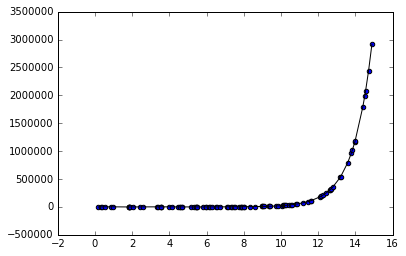

In [19]:
import math
f = lambda x: math.exp(x) + np.random.normal(mu,sigma)
data = generate_data(f, 0, 15, n=100)

domain = np.array([x[0] for x in data])
Y = np.array([x[1] for x in data])

for i in range(1,10):
    X = polynomials(domain, i)
    regr=linear_model.LinearRegression()
    regr.fit(X,Y)
    yhat = regr.predict(X)
    var = np.var(yhat)
    mse = np.mean((np.mean(yhat)-Y)**2)
    bias = mse - var - .01
    
    print("Residual sum of squares: %.2f" % mse)
    print("Bias: {bias}".format(bias=bias))
    print("Variance: {var}".format(var=var))
    
    plt.scatter(domain, Y)
    plt.plot(domain, yhat, color = "black")
    plt.show()

### A bad model for the exponential

To see a model with high variance, try fitting the model:

```
y = a sin(x) + b cos(x)
```

to `y = e^x`. Does this model have more bias or variance?